In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
grnd = pd.read_csv('pitchwin.csv')
grnd = grnd.sort_values('Win%')
grnd

,Ground,Cskplayed,Cskwon,Win%,Lose%
26,Cape Town,1,0,0.00,100.00
23,Kochi,1,0,0.00,100.00
22,Nagpur,1,0,0.00,100.00
21,Raipur,1,0,0.00,100.00
20,Ahmedabad,2,0,0.00,100.00
25,Cuttack,1,0,0.00,100.00
13,Durban,4,1,25.00,75.00
3,Kolkata,11,5,45.45,54.55
7,Abu Dhabi,8,4,50.00,50.00
19,Centurion,2,1,50.00,50.00


In [10]:
grnd['Ground'].unique()

array(['Cape Town', 'Kochi', 'Nagpur', 'Raipur', 'Ahmedabad', 'Cuttack',
       'Durban', 'Kolkata', 'Abu Dhabi', 'Centurion', 'Dharamsala',
       'Johannesburg', 'Jaipur', 'Mohali', 'Sharjah', 'Hyderabad',
       'Bengaluru', 'Ranchi', 'Mumbai', 'Dubai', 'Delhi', 'Chennai',
       'Pune', 'Visakhapatnam', 'Port Elizabeth', 'East London',
       'Kimberley'], dtype=object)

In [5]:
day = pd.read_csv('MatchDay.csv')
day = day.sort_values('Win%')
day

,Day,Cskplayed,Cskwon,Win%,Lose%
1,Sunday,38,20,52.63,47.37
5,Friday,24,13,54.17,45.83
0,Saturday,41,25,60.98,39.02
4,Thursday,24,15,62.50,37.50
6,Monday,19,12,63.16,36.84
2,Wednesday,24,16,66.67,33.33
3,Tuesday,24,16,66.67,33.33


In [13]:
day['Day'].unique()

array(['Sunday', 'Friday', 'Saturday', 'Thursday', 'Monday', 'Wednesday',
       'Tuesday'], dtype=object)

In [7]:
team = pd.read_csv('OppTeam.csv')
team = team.sort_values('Win%')
team

,Opponent,CSKLost,CSKWon,CSKPlayed,Win%,Lose%
0,Mumbai Indians,19,13,32,40.62,59.38
8,Kochi Tuskers Kerala,1,1,2,50.00,50.00
1,Rajasthan Royals,10,15,25,60.00,40.00
2,Punjab Kings,10,15,25,60.00,40.00
3,Delhi Capitals,10,16,26,61.54,38.46
4,Royal Challengers Bangalore,9,18,27,66.67,33.33
7,Pune Warriors,2,4,6,66.67,33.33
6,Kolkata Knight Riders,8,17,25,68.00,32.00
5,Sunrisers Hyderabad,8,18,26,69.23,30.77


In [14]:
team['Opponent'].unique()

array(['Mumbai Indians', 'Kochi Tuskers Kerala', 'Rajasthan Royals',
       'Punjab Kings', 'Delhi Capitals', 'Royal Challengers Bangalore',
       'Pune Warriors', 'Kolkata Knight Riders', 'Sunrisers Hyderabad'],
      dtype=object)

In [8]:
df= pd.read_csv('csk(sql).csv')
df

,Match,Date,Ground,Team1,Team2,Winner,Win by,Opponent,Day,csk
0,2,2008-04-19,Mohali,Punjab Kings,Chennai Super Kings,Chennai Super Kings,1st Batting,Punjab Kings,Saturday,1
1,8,2008-04-23,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,1st Batting,Mumbai Indians,Wednesday,1
2,11,2008-04-26,Chennai,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,Chasing,Kolkata Knight Riders,Saturday,1
3,15,2008-04-28,Bengaluru,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,1st Batting,Royal Challengers Bangalore,Monday,1
4,20,2008-05-02,Chennai,Chennai Super Kings,Delhi Capitals,Delhi Capitals,Chasing,Delhi Capitals,Friday,0
...,...,...,...,...,...,...,...,...,...,...
189,859,2021-10-02,Abu Dhabi,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,Chasing,Rajasthan Royals,Saturday,0
190,862,2021-10-04,Dubai,Chennai Super Kings,Delhi Capitals,Delhi Capitals,Chasing,Delhi Capitals,Monday,0
191,865,2021-10-07,Dubai,Chennai Super Kings,Punjab Kings,Punjab Kings,Chasing,Punjab Kings,Thursday,0
192,869,2021-10-10,Dubai,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,Chasing,Delhi Capitals,Sunday,1


In [9]:
df_feat = df[['Ground', 'Opponent', 'Day']]
df_feat.head()

,Ground,Opponent,Day
0,Mohali,Punjab Kings,Saturday
1,Chennai,Mumbai Indians,Wednesday
2,Chennai,Kolkata Knight Riders,Saturday
3,Bengaluru,Royal Challengers Bangalore,Monday
4,Chennai,Delhi Capitals,Friday


### Ranking the categorical variables

In [11]:
df_feat['Ground'] = df_feat['Ground'].map({'Cape Town': 2, 'Kochi': 2, 'Nagpur': 2, 'Raipur': 2, 'Ahmedabad': 1, 'Cuttack': 2,
       'Durban': 8, 'Kolkata': 7, 'Abu Dhabi': 6, 'Centurion': 6, 'Dharamsala': 6,
       'Johannesburg': 6, 'Jaipur': 6, 'Mohali': 6, 'Sharjah': 6, 'Hyderabad': 6,
       'Bengaluru': 5.5, 'Ranchi': 5, 'Mumbai': 5, 'Dubai': 4, 'Delhi': 3, 'Chennai': 2.5,
       'Pune': 2, 'Visakhapatnam': 1, 'Port Elizabeth': 1, 'East London': 1, 'Kimberley': 1})

c:\users\ibd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
df_feat['Opponent'] = df_feat['Opponent'].map({'Mumbai Indians': 10, 'Kochi Tuskers Kerala': 8, 'Rajasthan Royals': 6,
       'Punjab Kings': 6, 'Delhi Capitals': 5, 'Royal Challengers Bangalore': 3,
       'Pune Warriors': 3, 'Kolkata Knight Riders': 2, 'Sunrisers Hyderabad': 1})

c:\users\ibd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
df_feat['Day'] = df_feat['Day'].map({'Sunday': 10, 'Friday': 8, 'Saturday': 6, 'Thursday': 4, 'Monday': 3, 'Wednesday': 1,
       'Tuesday': 1})

c:\users\ibd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df_feat.head()

,Ground,Opponent,Day
0,6.0,6,6
1,2.5,10,1
2,2.5,2,6
3,5.5,3,3
4,2.5,5,8


In [ ]:
#X = pd.get_dummies(df_feat[['Ground','Opponent','Day']])
#X.head()

In [21]:
X = df_feat.copy()

In [22]:
y = df['csk']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: csk, dtype: int64

In [ ]:
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# encoder = LabelEncoder()

In [ ]:
#x1 = encoder.fit_transform(df_feat['Ground'])
#x1.shape

In [ ]:
#x1

In [ ]:
#x2 = encoder.fit_transform(df_feat['Opponent'])
#x2

In [ ]:
#x3 = encoder.fit_transform(df_feat['Day'])
#x3

In [ ]:
#X = pd.DataFrame({'Ground': x1, 'Opponent':x2, 'Day':x3})
#X

In [ ]:
#polyfeat = PolynomialFeatures(interaction_only=True, include_bias=False)

In [ ]:
#X = polyfeat.fit_transform(X)

In [ ]:
#X

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 29)

In [45]:
X_train.head()

,Ground,Opponent,Day
81,6.0,6,1
75,7.0,2,3
61,2.5,3,6
10,7.0,2,10
35,5.0,10,4


In [46]:
y_train.head()

81    1
75    1
61    1
10    1
35    0
Name: csk, dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regression

In [48]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters,cv=10)

In [49]:
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [50]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.650952380952381


In [51]:
LogScore = logreg_cv.score(X_test, y_test)
LogScore

0.5714285714285714

In [52]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Lost', 'Won']); ax.yaxis.set_ticklabels(['Lost', 'Won'])

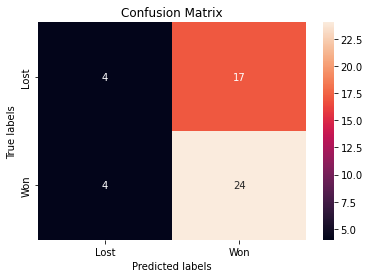

In [53]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### SVM

In [65]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [66]:
svm_cv = GridSearchCV(svm,parameters,cv=10)

In [ ]:
svm_cv.fit(X_train, y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
SvmScore = svm_cv.score(X_test, y_test)
SvmScore

We can plot the confusion matrix


In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### Decision Tree

In [54]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [55]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)

In [56]:
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [57]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.6828571428571428


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [58]:
TreeScore = tree_cv.score(X_test, y_test)
TreeScore

0.5306122448979592

We can plot the confusion matrix


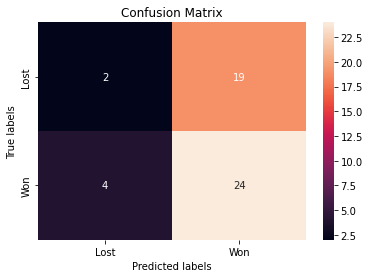

In [59]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [ ]:
y_test

### KNN Algorithm

In [60]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [61]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [62]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}
accuracy : 0.6366666666666666


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [63]:
KnnScore = knn_cv.score(X_test, y_test)
KnnScore

0.6122448979591837

We can plot the confusion matrix


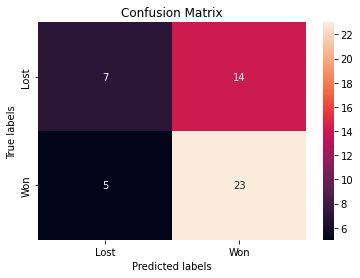

In [64]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)